## Van der Pol Oscillator 

$$ \ddot{x} + \mu (x^{2} -1) \dot{x} + x = 0$$ 

with $\mu  \ge 0$ (controlling nonlinearity and damping) 

If $\mu = 0$ reverts back to the harmonic oscillator 

Damping term $\mu(x^{2} -1) \dot{x}$, where the samping is state-dependent such that: 
- When $|x| <1$ the coefficient $(x^{2} -1) < 0$, there is negative damping and energy is pumped in
- When $|x| >1$ the coefficient $(x^{2} -1) > 0$, there is positive damping and energy is pumped out

In the case of small oscillations, it will grow but big oscillations will make it shrink 

#### Phase plane representation 

Rewrite in terms of system of 1st order ODEs 

$$\dot{x} = y$$ 
$$\dot{y} = \mu (1-x^{2})y- x$$ 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

Van der Pol oscillator with $\mu = 1.5$ and intial $x(0) = 0.5$, and $\dot{x}(0) = 0$

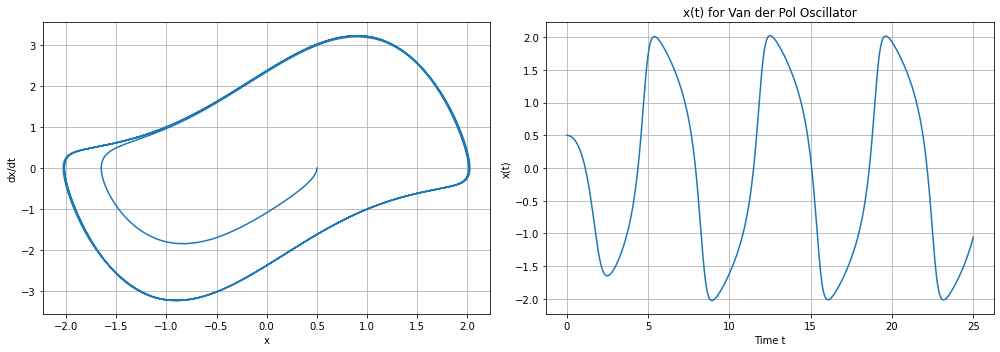

In [2]:
mu = 1.5

def van_der_pol(t, z):
    x, y = z
    dxdt = y
    dydt = mu * (1 - x**2) * y - x
    return [dxdt, dydt]

z0 = [0.5, 0]  
t_span = (0, 25) 
t_eval = np.linspace(t_span[0], t_span[1], 1000)  

sol = solve_ivp(van_der_pol, t_span, z0, t_eval=t_eval)

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].plot(sol.y[0], sol.y[1])
axs[0].set_xlabel("x")
axs[0].set_ylabel("dx/dt")
axs[0].grid(True)
axs[1].plot(sol.t, sol.y[0])
axs[1].set_title("x(t) for Van der Pol Oscillator")
axs[1].set_xlabel("Time t")
axs[1].set_ylabel("x(t)")
axs[1].grid(True)

plt.tight_layout()
plt.show()

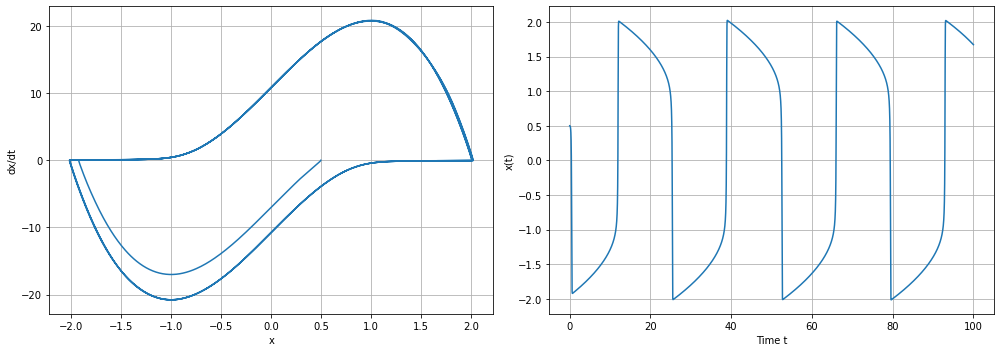

In [3]:
mu = 15

z0 = [0.5, 0]  
t_span = (0, 100)  
t_eval = np.linspace(t_span[0], t_span[1], 100000) 

sol = solve_ivp(van_der_pol, t_span, z0, t_eval=t_eval)

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].plot(sol.y[0], sol.y[1])
axs[0].set_xlabel("x")
axs[0].set_ylabel("dx/dt")
axs[0].grid(True)
axs[1].plot(sol.t, sol.y[0])
axs[1].set_xlabel("Time t")
axs[1].set_ylabel("x(t)")
axs[1].grid(True)

plt.tight_layout()
plt.show()

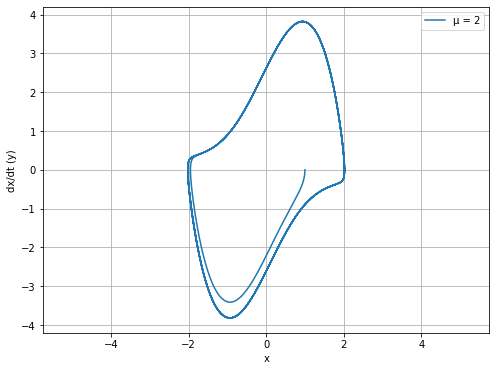

In [4]:
mu = 2  

t_span = (0, 40)
t_eval = np.linspace(t_span[0], t_span[1], 10000)
z0 = [1.0, 0.0]  

sol = solve_ivp(van_der_pol, t_span, z0, t_eval=t_eval)

plt.figure(figsize=(8, 6))
plt.plot(sol.y[0], sol.y[1], label=f'μ = {mu}')
plt.xlabel('x')
plt.ylabel('dx/dt (y)')
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()

In [5]:
mu = 0  

x1_vals = np.linspace(-3, 3, 30)
x2_vals = np.linspace(-3, 3, 30)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

DX1, DX2 = van_der_pol(X1, X2, mu)

magnitude = np.sqrt(DX1**2 + DX2**2)
DX1_norm = DX1 / magnitude
DX2_norm = DX2 / magnitude

plt.figure(figsize=(8, 6))
plt.quiver(X1, X2, DX1, DX2, angles='xy', color='gray')
plt.title(f"van der Pol Oscillator Phase Plane (μ = {mu})")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()

TypeError: van_der_pol() takes 2 positional arguments but 3 were given

In [ ]:
mu = 5 

x1_vals = np.linspace(-3, 3, 30)
x2_vals = np.linspace(-3, 3, 30)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

DX1, DX2 = van_der_pol(X1, X2, mu)

magnitude = np.sqrt(DX1**2 + DX2**2)
DX1_norm = DX1 / magnitude
DX2_norm = DX2 / magnitude

plt.figure(figsize=(8, 6))
plt.quiver(X1, X2, DX1_norm, DX2_norm, angles='xy', color='gray')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()

Theorems to prove presence of closed orbits or lack thereof 
- Closed orbits (trajectory that loops back in itself - periodic orbit) are impossible in gradient systems (vector field is the negative gradient of potential function, i.e. $\dot{x} = -\frac{\partial V}{\partial x}, \dot{y} = -\frac{\partial V}{\partial y})$. If there is a solution to $V(x,y)$, it exists and is a gradient system 
Potential $V(x,y)$ always decreases along trajectories unless it is at a fixed point. It can't become a closed loop unless $V$ is constant along the entire path, which only occurs at fixed points 
- If Liapunov function (energy-like function that decreases along trajectories, which must satisfy $V(x) >0$ and $\dot{V} <0$) exists, then closed orbits are forbidden 
    - Typically, Liapunov function $V$ is for linear systems of quadratic form $V(x,y) = x^{2} + a y^{2}$
- Dulac's criterion: for $\dot{x} = f(x)$ be continuously differentiable vector field, on simply connected subset R of the plane. There exists continuously differentiably, real-valued function $g(x)$ such $\nabla \cdot (g \dot{x})$ has one sign throughout $R$, then there are no closed orbits lying entirely in $R$ 

- Poincare-Bendixson theorem 
    - $R$ is closed, bounded subset of the plane 
    - $\dot{x} = f(X)$ is a continously differential vector field on an open set containing $R$ 
    - $R$ does not contain any fixed points 
    - There exists a trajectory $C$ that is 'confined' in $R$ in the sense that it start in $R$ and stays in $R$ for all future time 
    - Then either, $C$ is a closed orbit, or spirals towards a closed orbit 
    
    - In higher-dimensional systems ( $n\ge 3$), the Poincaré-Bendixson theorem no longer applies, and something radically new can happen: trajectories may wander around forever in a bounded region without settling down to a fixed point or a closed orbit. 

#### Lienard systems

Many oscillating circuits could be modeled by second-order differential equations of the form $\ddot{x} + f(x) \dot{x} + g(x) = 0$, which can then be rewritten in the form: 

$$\dot{x} = y$$

$$\dot{y} = - g(x) - f(x) y$$

Lienard's theorem 

- $f(x)$ and $g(x)$ are continuously differentiable for all $x$ 
- $g(-x) = -g(x)$ for all $x$ 
- $g(x)>0$ for $x>0$ 
- $f(-x) = f(x)$ for all $x$ 
- The odd function $F(x) = \int_{0}^{x} f(u)du$ has one positive zero at $x=a$, is negative for $0<x<a$, is positive and nondecreasing for $x>a$, and $F(x) \rightarrow \inf$, as $x \rightarrow \inf$ 

Van der Pol equation -- unique, stable limit cycle by the Lienard theorem 

The van der Pol equation can be rewritten as: $\ddot{x} + \mu (x^{2} -1) \dot{x} + x =0$ has $f(x) = \mu (x^{2} -1)$ and $g(x) = x$, then $F(X) = \mu (\frac{1}{3} x^{3} -x) = \frac{1}{3} \mu x (x^{2}-3)$

Hence, we find $a= \sqrt{3}$

#### Relaxation oscillations 

For larger $\mu$, the system exhibits relaxation oscillations (strongly nonlinear limit) 
- Slow movements along flat parts 
- Followed by fast dynamics, sharp jumps 

Consider van der Pol equation: $\ddot{x} + \mu (x^{2} -1) \dot{x} +x =0$ for $\mu>>1$ 

We let: $F(x) = \frac{1}{3} x^{3} -x$, $w = \dot{x} + \mu F(x)$

Such that the van der Pol equation implies that: 
$\dot{w} = \ddot{x} + \mu \dot{x} (x^{2}-1) = -x$ 

Van der Pol equation rewritten as: 
$$\dot{x} = w - \mu F(x)$$ 
$$\dot{w} = -x$$ 

Change in variable 
$$y = \frac{w}{\mu}$$

Such that it becomes: 
$$\dot{x} = \mu [y-F(x)]$$
$$\dot{y} = -\frac{1}{\mu}x$$ 

Plot the phase portrait (x vs. y) with the cubic nullcline 

Given that we are working in the singular limit, where $\mu >>1$, we apply geometric singular perturbation theroy (GSPT) 

We can also rewritten as written before for the Lienard system: 

$$\dot{x} = y$$
$$\dot{y} = \mu (1-x^{2}) y -x$$ 

We find the nullclines ($\dot{x} = 0$ and $\dot{y} = 0$), such the the x-nullcline is $y=0$ and the y-nullclines is $\mu(1-x^{2})y-x = 0$ such that $y = \frac{x}{\mu (1-x^{2})}$ 


Use of geometric singular perturbation theory 

- Analysis of systems with multiple timescales, typically one evolves much faster than another 

where oftentimes the fast-slow system is written as, with small parameter $\epsilon <<1$: 

$\epsilon \frac{dx}{dt} = f(x,y, \epsilon)$ 
(fast) 


$\frac{dy}{dt} = g(x,y, \epsilon)$ 
(slow) 

Critical manifold
- When fast dynamics are at equilibrium 
- Where solution lands after the fast transient is decayed 
$C_{0} = {(x,y)|f(x,y,0)=0}$

Fast subsystem - layer problem 
Rescaling of time by $\theta = t/ \epsilon$: 
- Description of how $x$ rapidly approaches critical manifold $C_{0}$, treating $y$ as a parameter 

$$\frac{dx}{d \theta} = f(x,y,0)$$

$$\frac{dy}{d \theta} = 0$$

Slow subsytem (reduced problem) 
- Description of how slow variable $y$ evolves along $C_{0}$ 

$$0 = f(x,y,0)$$

$$\frac{dy}{dt} = g(x,y,0)$$

Normal hyperbolicity 
- $C_{0}$ must be normally hyperbolic, where the Jacobian $\frac{\partial f}{\partial x}$ has no eigenvalues with zero real part which ensures that the manifold persists for $\epsilon >0$ 


GSPT 
- Provides geometric insight into behavior near critical manifolds 

=> Timscale separation from $\epsilon = \frac{1}{\mu^{2}}$ and obtain: 

$$\ddot{y} + \frac{1}{\sqrt{\epsilon}} (y^{2} - 1) \dot{y} + y =0$$ 

with $\epsilon <<1$ 
which produces sustained relaxation oscillations, with two slow and two fast segments 

=> Rescale time by $\tau = \sqrt{\epsilon}t$, such that it can be rewritten in the Lienards form: 

$$x' = - \epsilon y$$
$$y' = x+ y -\frac{y^{2}}{3}$$

or 

$$\epsilon \frac{dy}{dt} = (1-x^{2}) y -x$$

$$\frac{dx}{dt} = y$$ 

- $x$ is the slow variable 
- $y$ is the fast variable 
- $\epsilon$ controls the time-scale separation 

Oscillations most likely due to non-monotone 'current-voltage' characteristic 

1. Fast system (layer problem) 
Rescale time $\tau = t/ \epsilon$ such that $\frac{d}{d \tau} = \frac{1}{\epsilon} \frac{d}{dt} 

Then, 

$$\frac{dy}{d \tau} = (1-x^{2}) y -x$$
$$\frac{dx}{d \tau} = 0$$ 

- So $x$ is constant during the fast dynamics, the system relaxes in the y-direction onto a critical manifold 

2. Critical manifold $C_{0}$ 

Set $\epsilon = 0$, $f(x,y) = 0$ 

$$(1-x^{2}) y -x = 0$$
$$y= \frac{x}{1-x^{2}}$$ 

- which defined the critical manifold, the curve $(x,y) space where the fast dynamics vanish 

3. Normal hyperbolicity 
Compute $\frac{\partial f}{\partial y} = 1 - x^{2}$
- If $|x| <1$, eigenvalue is positive, repelling 
- If $|x| >1$, eigenvalue is negative, attracting 
- If $x = \pm 1$, eigenvalue is $0$, loss of normal hyperbolicity 

4. Slow system (reduced problem) 
On the critical manifold $y = \frac{x}{1-x^{2}}$ 
The slow dynamics evolve along $C_{0}$: 
$$\frac{dx}{dt} = y = \frac{x}{1-x^{2}}$$ 

So the motion along the critical manifold is governed by this nonlinear ODE 

- At $x = \pm 1$, the manifold becomes singular (goes to infinity), where the fast jump occurs, switching from slow to fast dynamics 


In [ ]:
def F(x):
    return (x**3) / 3 - x

x_vals = np.linspace(-3, 3, 400)
y_vals = np.linspace(-4, 4, 400)
X, Y = np.meshgrid(x_vals, y_vals)

dx = Y - F(X)
dy = -X

magnitude = np.sqrt(dx**2 + dy**2)
dx_norm = dx / magnitude
dy_norm = dy / magnitude

fig, ax = plt.subplots(figsize=(10, 6))
ax.streamplot(X, Y, dx_norm, dy_norm, density=1.2, linewidth=0.8, arrowsize=1)
x_null = np.linspace(-2, 2, 500)
y_null = F(x_null)
ax.plot(x_null, y_null, 'r--', linewidth=2, label='Cubic nullcline $y = F(x)$')
ax.text(-1.8, F(-1.8)+0.5, "→ fast jump", color='blue')
ax.text(0, F(0)+0.5, "↓ slow crawl", color='green', ha='center')
ax.text(1.8, F(1.8)-0.5, "← fast jump", color='blue', ha='right')
ax.set_xlim(-3, 3)
ax.set_ylim(-4, 4)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

Estimation of period of limit cycle for the van der Pol equation for $\mu >>1$ 

Period $T$ is the time required to travel along two slow branches, since the time spent in the jumps is negligeable for large $\mu$ 

Such that: $T \approx 2 \int^{t_{B}}{t_{A}}dt$

To derive an expression for $dt$, on the slow branches, we know: $\frac{dy}{dt} \approx F'(x) \frac{dx}{dt} = (x^{2}-1) \frac{dx}{dt}$

Since $\frac{dy}{dt} = \frac{-x}{\mu}$, we find $\frac{dx}{dt} = - \frac{x}{\mu (x^{2} -1)}$. Then, 

$$dt \approx - \frac{\mu (x^{2} -1)}{x} dx$$

on a slow branch. Hence, 

$$T \approx 2 \int^{1}_{2} \frac{- \mu}{x} (x^{2} -1)dx = 2 \mu [\frac{x^{2}}{x} - lnx|]^{2}_{1} = \mu [3-2ln2]$$


Weakly nonlinear oscillators 

with equations of the form: $\ddot{x} + x + \epsilon h(x, \dot{x}) =0$ 

with $0 < \epsilon << 1$ and $h(x, \dot{x})$ an arbitrary smooth function like an example: van der pol equation 
